In [1]:
#Q1
#Q1
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Step 1: Load California housing data
california_housing = fetch_california_housing()

In [2]:
# Convert to DataFrame
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['Price'] = california_housing.target  # Add target as 'Price'
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
X = df.drop('Price', axis=1)  # Features (all columns except 'Price')
y = df['Price']  # Target (Price of the house)

In [4]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 3: Create a Multiple Linear Regression model
model = LinearRegression()

In [6]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

In [8]:
# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.56


In [9]:
# Step 6: Predict house price for a specific input (optional)
# Example: Predict price for a house with specific feature values (you can modify this as needed)
example_input = pd.DataFrame([[8.5, 0.0, 0.0, 3.5, 300, 30, 1.2, 1.0]], columns=X.columns)  # Modify with appropriate values
predicted_price = model.predict(example_input)
print(f"Predicted price for the example input: ${predicted_price[0]:.2f}")

Predicted price for the example input: $-31.51


In [10]:
#Q2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [11]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [12]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [14]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [15]:
X = df[['Level']].values # Features (Level)
y = df['Salary'].values # Target (Salary)

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [17]:
y_pred_linear = lin_reg.predict(X)
r2_linear = r2_score(y, y_pred_linear)

print(f"R2 Score of Simple Linear Regression: {r2_linear}")

R2 Score of Simple Linear Regression: 0.6690412331929895


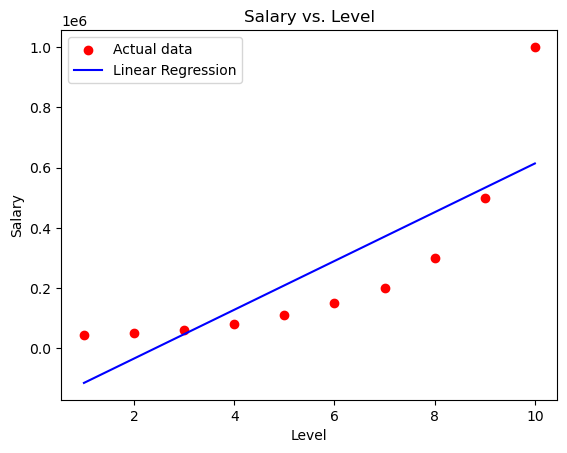

In [18]:
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, y_pred_linear, color='blue', label='Linear Regression')
plt.title('Salary vs. Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [19]:
levels_to_predict = np.array([[11], [12]])

salary_pred_linear = lin_reg.predict(levels_to_predict)
print(f"Linear Regression Predictions for Levels 11 and 12:{salary_pred_linear}")

Linear Regression Predictions for Levels 11 and 12:[694333.33333333 775212.12121212]
